In [91]:
import pandas as pd
from pathlib import Path
import numpy  as np
from sklearn.model_selection import train_test_split
from pandas_ods_reader import read_ods
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [73]:
df=pd.read_csv("pd_speech_features2.csv")

In [74]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [75]:
df=df.drop(["id",'gender'],axis=1)

In [77]:
data=df.to_numpy(dtype=np.float32)

In [78]:

features, labels = data[:, :-1], data[:, -1]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3,train_size=0.7,random_state=0) # 70% training and 30% test
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((528, 752), (227, 752), (528,), (227,))

In [81]:
rfe=RandomForestClassifier()

In [83]:
rfe.fit(X_train,y_train)

RandomForestClassifier()

In [84]:
y_pre=rfe.predict(X_test)

In [86]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

         0.0       0.90      0.63      0.74        59
         1.0       0.88      0.98      0.93       168

    accuracy                           0.89       227
   macro avg       0.89      0.80      0.83       227
weighted avg       0.89      0.89      0.88       227



In [89]:
import sklearn
sklearn.metrics.accuracy_score(y_test,y_pre,normalize=True)

0.8854625550660793

In [92]:
parameter={'max_depth':range(1,40)}

In [93]:
n_folds=5

In [99]:
dtree=RandomForestClassifier(criterion='gini',random_state=100)

In [100]:
tree=GridSearchCV(dtree,parameter,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [101]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.247839,0.021252,0.013964,0.001580,1,{'max_depth': 1},0.754717,0.745283,0.745283,0.752381,...,0.750009,0.003952,1,0.748815,0.751185,0.751185,0.749409,0.749409,0.750001,0.000991
1,0.355631,0.026910,0.013541,0.000883,2,{'max_depth': 2},0.754717,0.745283,0.745283,0.752381,...,0.750009,0.003952,1,0.748815,0.751185,0.751185,0.749409,0.749409,0.750001,0.000991
2,0.423865,0.010764,0.012848,0.000993,3,{'max_depth': 3},0.754717,0.745283,0.745283,0.752381,...,0.750009,0.003952,1,0.755924,0.751185,0.751185,0.754137,0.754137,0.753314,0.001857
3,0.522125,0.026142,0.013215,0.000880,4,{'max_depth': 4},0.754717,0.745283,0.745283,0.752381,...,0.750009,0.003952,1,0.779621,0.770142,0.763033,0.784870,0.758865,0.771306,0.009774
4,0.579582,0.013844,0.013809,0.001352,5,{'max_depth': 5},0.754717,0.745283,0.745283,0.752381,...,0.748104,0.004593,7,0.817536,0.834123,0.805687,0.813239,0.796690,0.813455,0.012532


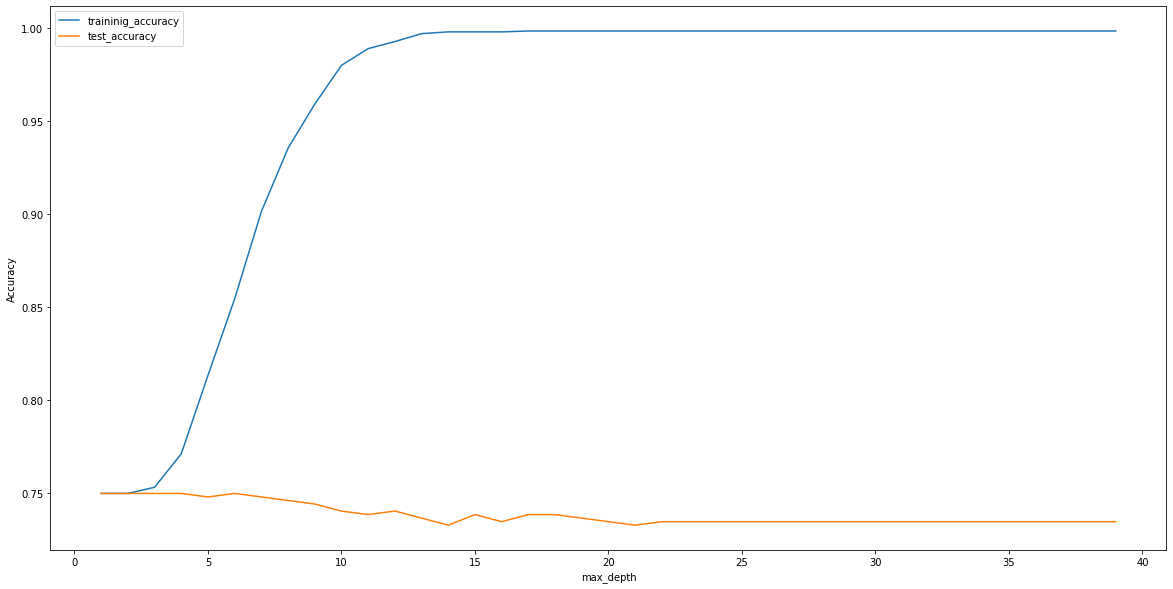

In [102]:
plt.figure(figsize=(20,10))
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
        label="traininig_accuracy")
plt.plot(scores["param_max_depth"],
        scores['mean_test_score'],
        label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [103]:
    parameter={'min_samples_leaf':range(5,200,20)}

In [104]:
dtree=RandomForestClassifier(criterion='gini',random_state=100)

In [105]:
tree=GridSearchCV(dtree,parameter,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [106]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.736529,0.016835,0.013285,0.000180,5,{'min_samples_leaf': 5},0.764151,0.735849,0.754717,0.752381,...,0.749991,0.009792,10,0.921801,0.921801,0.924171,0.921986,0.933806,0.924713,0.004634
1,0.455656,0.033892,0.013944,0.000615,25,{'min_samples_leaf': 25},0.754717,0.745283,0.745283,0.752381,...,0.750009,0.003952,1,0.748815,0.751185,0.751185,0.749409,0.749409,0.750001,0.000991
2,0.377955,0.056633,0.016215,0.004820,45,{'min_samples_leaf': 45},0.754717,0.745283,0.745283,0.752381,...,0.750009,0.003952,1,0.748815,0.751185,0.751185,0.749409,0.749409,0.750001,0.000991
3,0.273068,0.003420,0.012501,0.000174,65,{'min_samples_leaf': 65},0.754717,0.745283,0.745283,0.752381,...,0.750009,0.003952,1,0.748815,0.751185,0.751185,0.749409,0.749409,0.750001,0.000991
4,0.277557,0.025606,0.015069,0.002458,85,{'min_samples_leaf': 85},0.754717,0.745283,0.745283,0.752381,...,0.750009,0.003952,1,0.748815,0.751185,0.751185,0.749409,0.749409,0.750001,0.000991


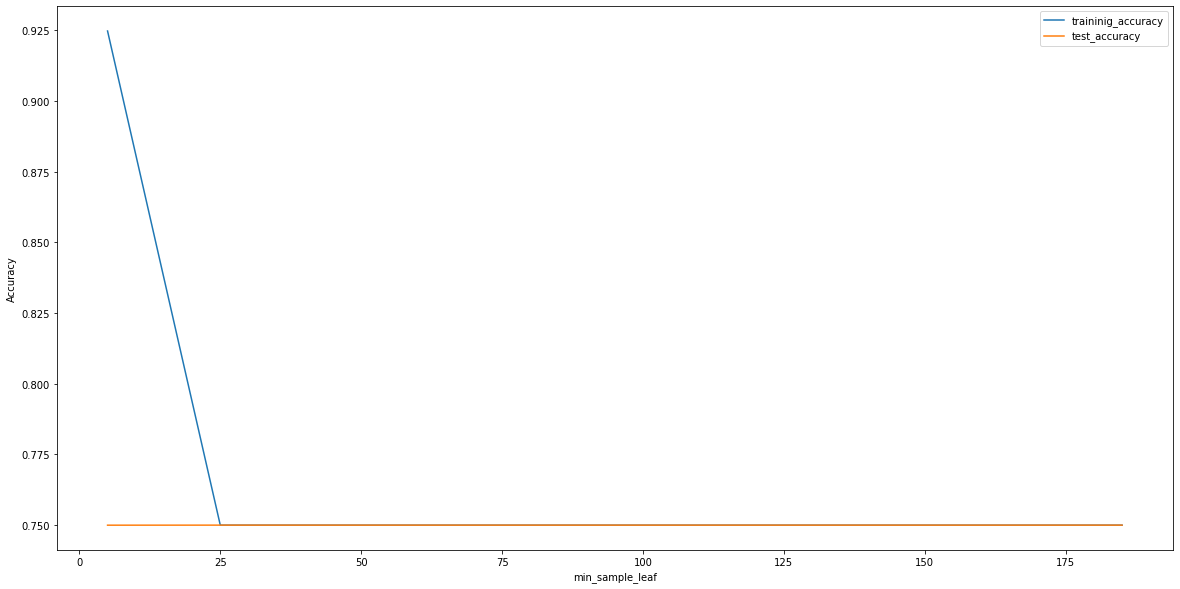

In [107]:
plt.figure(figsize=(20,10))
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
        label="traininig_accuracy")
plt.plot(scores["param_min_samples_leaf"],
        scores['mean_test_score'],
        label="test_accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [108]:
param_grid={
    'max_depth':range(5,15,5),
    'min_samples_leaf':range(50,150,50),
    'min_samples_split':range(50,150,50),
    'criterion':["entropy","gini"]
}

In [109]:
grid_search=GridSearchCV(estimator=dtree,param_grid=param_grid,cv=n_folds,verbose=1)

In [110]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [111]:
cv_results=pd.DataFrame(grid_search.cv_results_)

In [112]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.406932,0.064964,0.013924,0.001279,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.754717,0.745283,0.745283,0.752381,0.752381,0.750009,0.003952,1
1,0.427385,0.023987,0.018988,0.002844,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.754717,0.745283,0.745283,0.752381,0.752381,0.750009,0.003952,1
2,0.229298,0.006026,0.012839,0.000863,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.754717,0.745283,0.745283,0.752381,0.752381,0.750009,0.003952,1
3,0.226109,0.005415,0.012267,0.000228,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.754717,0.745283,0.745283,0.752381,0.752381,0.750009,0.003952,1
4,0.354836,0.016779,0.013296,0.000851,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.754717,0.745283,0.745283,0.752381,0.752381,0.750009,0.003952,1
5,0.420518,0.034960,0.016132,0.004027,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.754717,0.745283,0.745283,0.752381,0.752381,0.750009,0.003952,1
6,0.241509,0.013811,0.012870,0.000747,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.754717,0.745283,0.745283,0.752381,0.752381,0.750009,0.003952,1
7,0.236075,0.012836,0.013026,0.000684,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.754717,0.745283,0.745283,0.752381,0.752381,0.750009,0.003952,1
8,0.310664,0.007580,0.012465,0.000246,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.754717,0.745283,0.745283,0.752381,0.752381,0.750009,0.003952,1
9,0.307688,0.010903,0.012425,0.000074,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.754717,0.745283,0.745283,0.752381,0.752381,0.750009,0.003952,1


In [113]:
print("best accuracy",grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7500089847259659
RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50, random_state=100)


In [116]:
clf_gini=RandomForestClassifier(criterion="gini",random_state=100,
                              max_depth=10,min_samples_leaf=50,
                              min_samples_split=50)

In [117]:
clf_gini.fit(x_test,y_test)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [118]:
y_pred=clf_gini.predict(x_test)

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        59
         1.0       0.74      1.00      0.85       168

    accuracy                           0.74       227
   macro avg       0.37      0.50      0.43       227
weighted avg       0.55      0.74      0.63       227



/home/sahitya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sahitya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sahitya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
